# The Quantum Harmonic oscillator 
## Safwan Ahmed 22006797

The ground state energy equation in one dimension is given by: $ E_{gs} = \frac{\alpha}{2} + \frac{1}{8\alpha} $

Therefore the derivative energy function is: $  dE_{gs} =  \frac{1}{2} - \frac{1}{8\alpha^2} $

This equation is a solution for a wavefunction and we will be using root finding approximation methods in python to find the minimum in both 1 and 2 dimensions. 

In [1]:
import math as m
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

### 1-Dimensional Quantum Harmonic Oscillator

Here we will implement three functions: One to calculate the Ground State Energy, one to calculate its derivative at a point and the bisection method. We will inspect the energy function to determine a suitable interval where its minimum would lie. We would then use the bisection method on the derivative energy function to determine the alpha at which the derivative is zero. This value of alpha inputted into the energy function will tell us what the minimum energy is.  

In [2]:
 def bisection(fun,a,b,tol):
    """
    Finds the root of a function at a specified tolerance through the bisection method using a given interval.  
    Input: function, lower number of interval, higher number of the interval, tolerance
    Output: Root of the function to the tolerance given
    
    """
    # Initialise counter
    n = 0     
    dif = b-a
    c = tol + 100 # any number above tol
    while c > tol: # Iterate while above tolerance level
        dif *= 0.5
        if fun(a + dif) > 0: #Check to see which bracket to move
            b -= dif
        else:
            a += dif
        c = abs(fun((a+b)/2))
        n += 1
        
    return n, (a+b)/2 

In [3]:
def QHO_E(alpha):
    """   
    Gives the ground state energy for a wavefunction for a Quantum Harmonic Oscillator at a given value of alpha in 1 dimension
    Input: Alpha
    Output: Energy

    """
    E = alpha / 2 + 1 / (8 * alpha)
    return E

In [4]:
def QHO_grad(alpha):
    """
    Gives the gradient for the ground state equation at a given value of alpha in 1 dimension
    Input: Alpha
    Output:  Gradient of energy function
    """
    dE = 1/2 - 1 / (8 * alpha ** 2)
    return dE

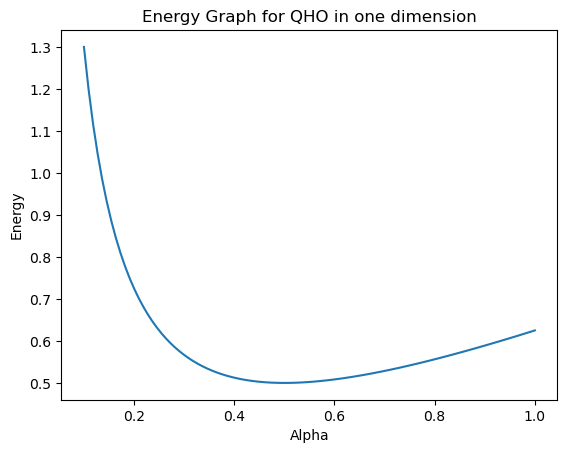

In [17]:
# Plot the energy graph to determine a suitable interval 
x1 = np.linspace(0.1,1, 100)
plt.plot(x1, QHO_E(x1))
plt.title('Energy Graph for QHO in one dimension')
plt.xlabel('Alpha')
plt.ylabel('Energy');

From the graph above, it seems a suitable interval to find the minimum would be between 0.4 and 0.6.

In [6]:
# Define brackets and tolerance
n, alpha = bisection(QHO_grad, 0.4, 0.6, 10 ** -10) # find the alpha which makes the energy derivative function equal 0
print(f'The minimum energy is {alpha} eV')
print(f'Number of iterations done is {n}')

The minimum energy is 0.5000000000465661 eV
Number of iterations done is 31


When we solve for the derivative energy function, we get an exact answer of 0.5. So our solution is correct and accurate to the tolerance level we specified.  

### 2-Dimensions
In 2 dimensions, the energy function looks like: $$ E_{gs} = \frac{\alpha}{2} + \frac{1}{8\alpha} +\frac{\beta}{2} + \frac{1}{8\beta}. $$
Its derivatives with respect to $\alpha$ and $\beta$ are $$dE_{gs} =  \frac{1}{2} - \frac{1}{8\alpha^2}$$ and $$dE_{gs} =  \frac{1}{2} - \frac{1}{8\beta^2}.$$ 

In [7]:
def QHO_2D_grad(x):
    """   
    Gives the gradient for the ground state equation at a given value of alpha and beta in 2 dimensions
    Input: Alpha, Beta as a 2 entry array
    Output:  Gradient of energy function"""

    a,b = x[0], x[1]
    
    dE_da = 1/2 - 1/(8 * a ** 2)
    dE_db = 1/2 - 1/(8 * b ** 2)
    
    return np.array([dE_da, dE_db]) 

In [8]:
def QHO_2D_E(x):
    """
    Gives the ground state energy for a wavefunction for a Quantum Harmonic Oscillator at a given value of alpha and beta in 
    2 dimensions
    Input: Alpha, Beta as a 2 entry array
    Output: Energy
    """
    a,b = x[0], x[1]
    E = a/2 + 1/(8*a) + b/2 + 1/(8*b)
    return E

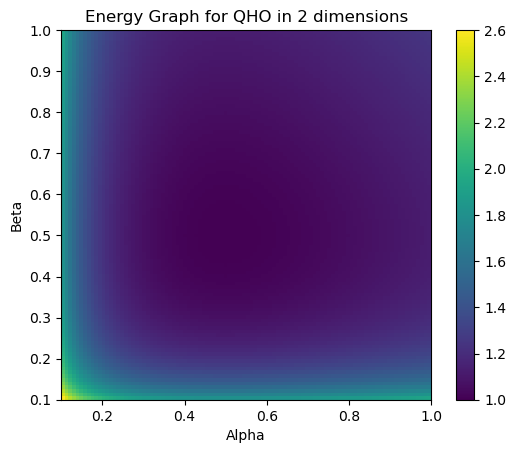

In [18]:
x,y = np.linspace(0.1,1,100), np.linspace(0.1,1,100)
xin = np.meshgrid(x,y)
E2D = QHO_2D_E(xin)
plt.imshow(E2D,extent=(0.1,1,0.1,1), origin='lower');
plt.axis('scaled')
plt.title('Energy Graph for QHO in 2 dimensions')
plt.xlabel('Alpha')
plt.ylabel('Beta');
plt.colorbar();

In [13]:
from scipy import optimize
x0 = np.array([0.55 , 0.55]) # Pick a starting point
opt_result = optimize.minimize(QHO_2D_E, x0, method='CG', jac= QHO_2D_grad)

In [19]:
print(f'The optimum values of alpha and beta were {opt_result.x[0]} and {opt_result.x[1]} respectively')
print(f'The number of iterations done was {opt_result.nit}')

The optimum values of alpha and beta were 0.5000000235669899 and 0.5000000235669899 respectively
The number of iterations done was 3


Solving the equations by hand, one obtains a value of 0.5 for both alpha and beta. The approximation method was therefore fairly accurate in finding the optimum values. 

### Conclusion
The bisection method was very accurate in finding our root using a reasonable amount of iterations while the minimise function from the Scipy library was very accurate using very few iterarations. Plotting these functions also allowed us to take a reasonable guess at where our minimum would be located, before performing our approximation methods, allowing our functions to execute in a very quick time